# **Granjas**

## 1.Librerias y Archivos


Importamos las librerias necesarias para la carga de los datos, la union de archivos y visualización

In [8]:
#Importar librerias
import warnings
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns   
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

#Rutas locales
csv_path = 'Data/medical_numeric_subset.csv'
sql_path = 'Data/medical_subset.sql'

## 2.Creacion del Dataframe

Hacemos el nuevo DataFrame usando los CSV y el SQL

In [9]:
# Leer el CSV con las columnas numéricas
df_num = pd.read_csv(csv_path)

# Crear base de datos en memoria e importar el script SQL
conn = sqlite3.connect(':memory:')
with open(sql_path, 'r') as f:
    conn.executescript(f.read())

# Leer la tabla categórica que volcaste en el SQL dump
df_cat = pd.read_sql('SELECT * FROM medical_categorical_subset', conn)

# Unimos por el índice original: añadimos un campo auxiliar
df_num = df_num.reset_index().rename(columns={'index': 'record_id'})
df_cat = df_cat.reset_index().rename(columns={'index': 'record_id'})

# Merge por 'record_id'
df = pd.merge(df_cat, df_num, on='record_id').drop(columns=['record_id'])

# Verificar y mostrar resultados, cabe aclarar que en los generos 0 es femenino y 1 masculino
print("Shape del DataFrame combinado:", df.shape)
print(df.head())

# Cerrar la conexión a la base de datos, para liberar recursos
conn.close()

Shape del DataFrame combinado: (1319, 9)
   Gender  CK-MB  Troponin    Result  Age  Heart rate  \
0       1   1.80     0.012  negative   64          66   
1       1   6.75     1.060  positive   21          94   
2       1   1.99     0.003  negative   55          64   
3       1  13.87     0.122  positive   64          70   
4       1   1.08     0.003  negative   55          64   

   Systolic blood pressure  Diastolic blood pressure  Blood sugar  
0                      160                        83        160.0  
1                       98                        46        296.0  
2                      160                        77        270.0  
3                      120                        55        270.0  
4                      112                        65        300.0  


### 2.1. Limpieza de datos

### 2.1.Revision Categoría de Enfermedad
Revisamos las respuestas unicas de la categoria de result

In [10]:
#Monstramos las respuestas de la variable categorica de enfermedad del cultivo

df["Result"].unique()

array(['negative', 'positive'], dtype=object)

### 2.2.Descripción de los Datos

Monstamos la cantidad y el tipo de dato de cada columna

In [11]:
#Miramos la información Básica, la cantidad de respuestas y el tipo de dato de cada columna

df.info()

# Usamos una funcion para observar una descripcion basica de los datos

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    1319 non-null   int64  
 1   CK-MB                     1319 non-null   float64
 2   Troponin                  1319 non-null   float64
 3   Result                    1319 non-null   object 
 4   Age                       1319 non-null   int64  
 5   Heart rate                1319 non-null   int64  
 6   Systolic blood pressure   1319 non-null   int64  
 7   Diastolic blood pressure  1319 non-null   int64  
 8   Blood sugar               1319 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


,Gender,CK-MB,Troponin,Age,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.659591,15.274306,0.360942,56.191812,78.336619,127.170584,72.269143,146.634344
std,0.474027,46.327083,1.154568,13.647315,51.630270,26.122720,14.033924,74.923045
min,0.000000,0.321000,0.001000,14.000000,20.000000,42.000000,38.000000,35.000000
25%,0.000000,1.655000,0.006000,47.000000,64.000000,110.000000,62.000000,98.000000
50%,1.000000,2.850000,0.014000,58.000000,74.000000,124.000000,72.000000,116.000000
75%,1.000000,5.805000,0.085500,65.000000,85.000000,143.000000,81.000000,169.500000
max,1.000000,300.000000,10.300000,103.000000,1111.000000,223.000000,154.000000,541.000000


### 2.3.Busqueda de Valores Nulos

Buscamos valores nulos en el dataset, ya que estos valores pueden volver inutiles algunas columnas o puede que solo se hayan malinterpretado

In [12]:
#Buscamos valores vacios

df.isnull().sum()

Gender                      0
CK-MB                       0
Troponin                    0
Result                      0
Age                         0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
dtype: int64

### 2.4.Guardado del Archivo CSV

Guardamos el Archivo armado y en forma de CSV para usarlo en el codigo de entrenamiento del modelo

In [13]:
#Guardar el data frame formado en un csv
output_csv = 'Data/medical_data.csv'
df.to_csv(output_csv, index=False)
print(f'DataFrame guardado en: {output_csv}')

DataFrame guardado en: Data/medical_data.csv


## 3.Visualización de Datos

Ya con los datos, creamos diferentes graficas para entender mejor los datos

### 3.1.Gráfica de Calor

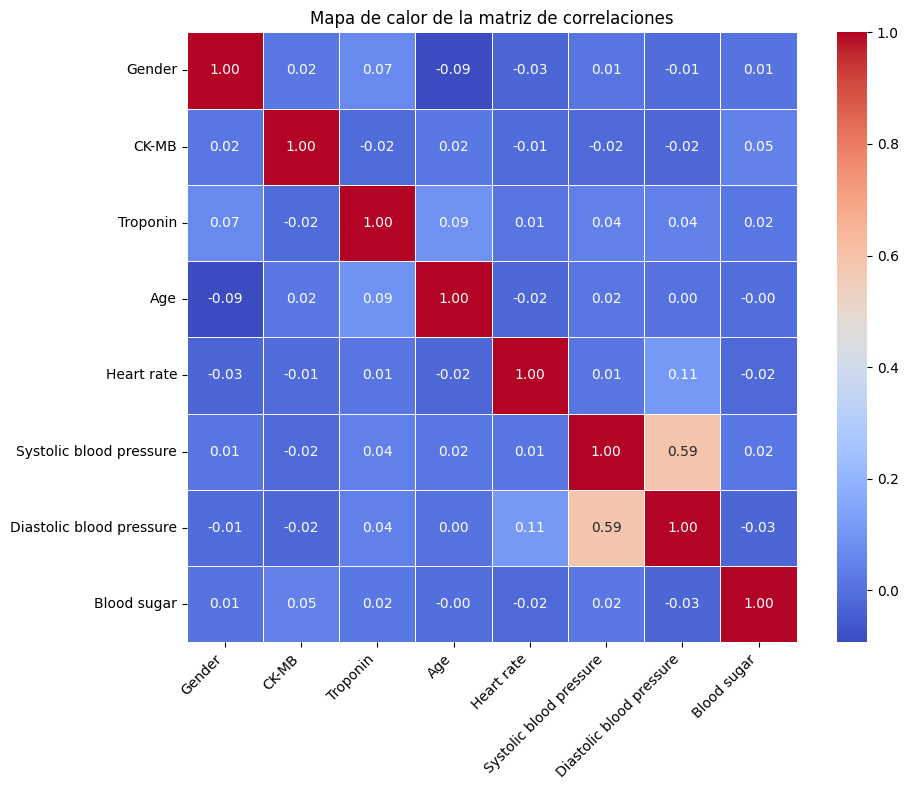

In [14]:
#Mapa de calor, donde podemnos ver que los datos solo se correlacionan ligeramente
#Selecciona solo las columnas numéricas
numeric_df = df.select_dtypes(include='number')

#Calcula la matriz de correlación
corr = numeric_df.corr()

#Dibuja el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cmap="coolwarm",
    square=True
)
plt.title("Mapa de calor de la matriz de correlaciones")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 3.2.Gráfica de Pastel de los Ataques Cardiacos
Se puede ver que la mayoria subre problemas cardiacos

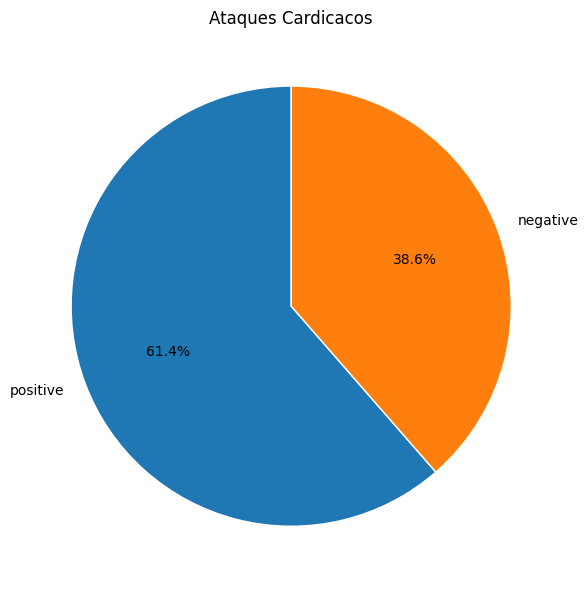

In [15]:
#Conteos por categoría
counts = df['Result'].value_counts()

#Grafucicar
plt.figure(figsize=(6,6))
plt.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor':'white'}
)
plt.title('Ataques Cardicacos')
plt.axis('equal')
plt.tight_layout()
plt.show()

### 3.3.Gráfico de Pastel de los Ataques Cardiacos segun el Género
Donde se puede observar que los hombres son mas propensos a los ataques cardiacos que las mujeres

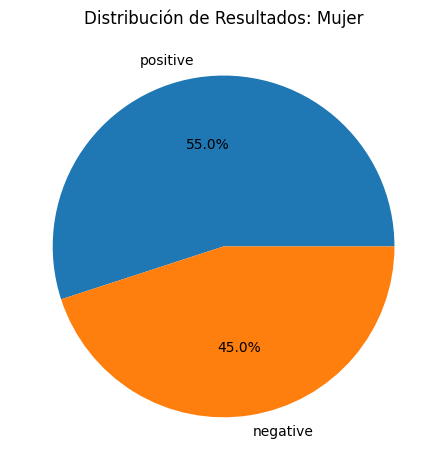

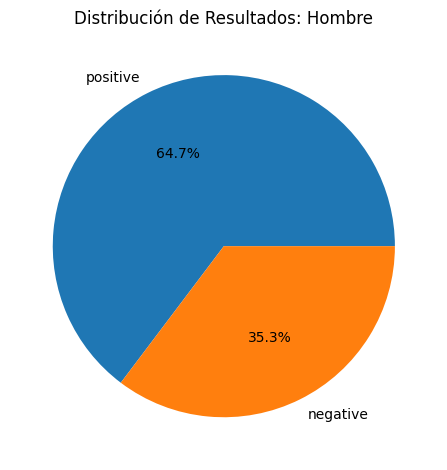

In [16]:
# Mapear Gender: 1 → Hombre, 0 → Mujer
df['Gender_label'] = df['Gender'].map({1: 'Hombre', 0: 'Mujer'})

# Generar gráficos de pastel para cada género
for gender in ['Mujer', 'Hombre']:
    counts = df[df['Gender_label'] == gender]['Result'].value_counts()
    plt.figure()
    plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
    plt.title(f'Distribución de Resultados: {gender}')
    plt.tight_layout()
    plt.show()

### 3.4.Gráfico de Barras de la Edad y Ataques cardiacos
Donde a partir de los 40 años, hay mas cantidad de personas que sufren problemas cardiacos

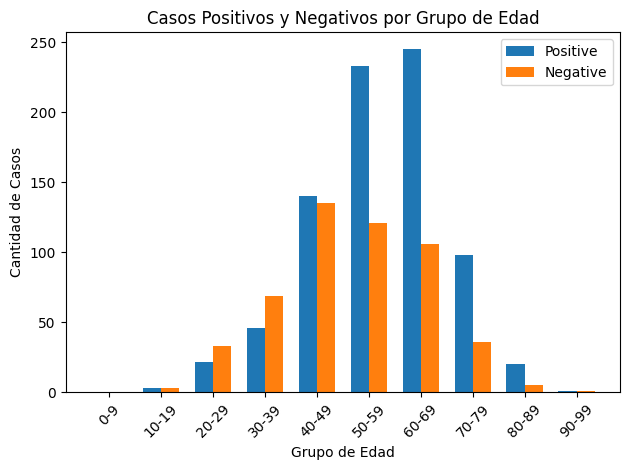

In [17]:
# Definir bins de edad (decadas)
bins = list(range(0, 101, 10))
labels = [f"{i}-{i+9}" for i in bins[:-1]]
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Contar por grupo de edad y resultado
counts = df.groupby(['Age_group', 'Result']).size().unstack(fill_value=0)

# Gráfico de barras agrupadas por edad
x = np.arange(len(labels))
width = 0.35

plt.figure()
plt.bar(x - width/2, counts['positive'], width, label='Positive')
plt.bar(x + width/2, counts['negative'], width, label='Negative')
plt.xticks(x, labels, rotation=45)
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Casos')
plt.title('Casos Positivos y Negativos por Grupo de Edad')
plt.legend()
plt.tight_layout()
plt.show()